In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [3]:
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60]


In [7]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/c38/Oct-18-2024-23-12-40_0.01600687204597684_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 100])
output_trimmed = output_trimmed.reset_index(drop=True)
output_trimmed = output_trimmed[~output_trimmed["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


4.0 0.0003854698585890583 13
4.5 0.00032502257088962817 13
5.0 0.0002811831543105481 13
5.5 0.0004268534845244411 12
6.0 0.0003808936205035572 12


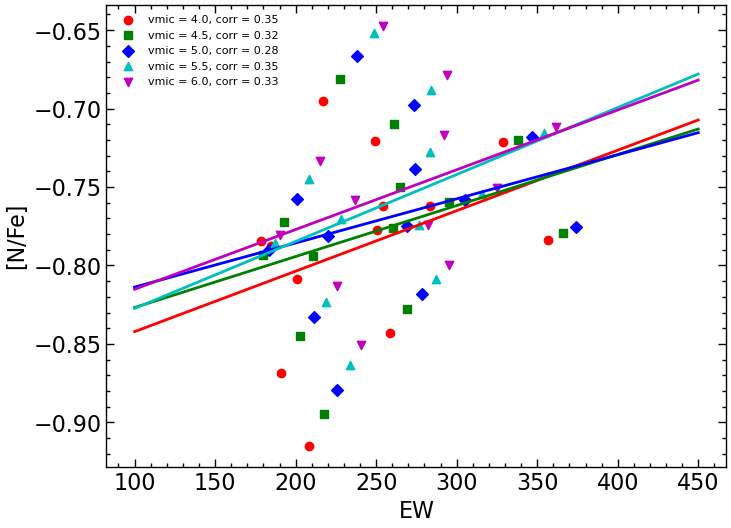

In [15]:
vmics = np.unique(output_trimmed["Microturb"].values)
cs = ['r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', 'D', '^', 'v', 'p']
for i in range(len(vmics)):
    vmic = vmics[i]
    output_trimmed3 = output_trimmed[output_trimmed["Microturb"] == vmic]
    ews = np.array(output_trimmed3["ew"])
    nfes = np.array(output_trimmed3["O_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    # choose_idxs = np.where(np.abs(nfes - mean_nfe) < 20*std_nfe)
    choose_idxs = np.where(ews < 380)
    choose_idxs = choose_idxs[0]
    choose_idxs2 = np.where(np.abs(nfes - mean_nfe) < 3*std_nfe)
    choose_idxs2 = choose_idxs2[0]
    choose_idxs = np.intersect1d(choose_idxs, choose_idxs2)
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(100, 450, 100)
    y = m*x + c
    print(vmics[i], m, len(nfes))
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")

In [64]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-17-56-23_0.9778841550265323_LTE_C_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [65]:
output_results_pd_df

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD137613.txt,22743.35,22742.0,22744.7,-0.8043,0.0,1.1738,6.5,0.0,0.0,4.849353,355.4072,0,0
1,HD137613.txt,22799.60,22798.0,22801.2,-1.7317,0.0,1.1333,6.5,0.0,0.0,7.452589,319.8972,0,0
2,HD137613.txt,22804.50,22802.0,22807.0,-2.1328,0.0,1.1773,6.5,0.0,0.0,7.068582,573.6960,0,0
3,HD137613.txt,22879.25,22877.0,22881.5,-2.5000,0.0,1.5892,6.5,0.0,0.0,516.901192,191.4586,10000,10010000


In [66]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD137613.txt,22743.35,22742.0,22744.7,-0.8043,0.0,1.1738,6.5,0.0,0.0,4.849353,355.4072,0,0
1,HD137613.txt,22799.60,22798.0,22801.2,-1.7317,0.0,1.1333,6.5,0.0,0.0,7.452589,319.8972,0,0
2,HD137613.txt,22804.50,22802.0,22807.0,-2.1328,0.0,1.1773,6.5,0.0,0.0,7.068582,573.6960,0,0


In [67]:
solar_abundances['C'] + np.mean(output_trimmed["C_Fe"])

np.float64(9.721466666666668)

In [57]:
np.std((output_trimmed["C_Fe"]))

np.float64(0.03444825426958844)

In [58]:
solar_abundances['N'] + np.mean(output_trimmed["N_Fe"])

np.float64(9.188366666666667)

In [71]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-17-58-56_0.3369505278663768_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [72]:
np.mean(output_trimmed["chi_squared"])

np.float64(6.3280030047779405)

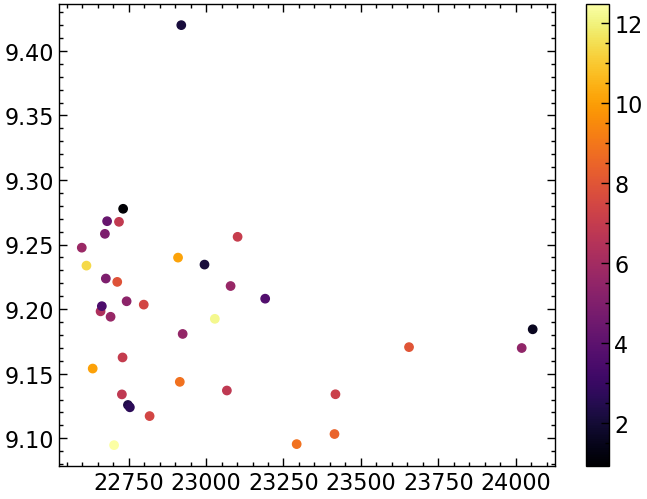

In [73]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['N_Fe']+7.98, c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [91]:
for i in range(len(output_trimmed)):    
    print(f"{output_trimmed['wave_center'].iloc[i]}  {output_trimmed['wave_start'].iloc[i]}  {output_trimmed['wave_end'].iloc[i]}")

22937.75  22936.5  22939.0
22940.75  22939.0  22942.5
22947.4  22946.0  22948.8
22966.0  22964.6  22967.4
22971.3  22969.5  22973.1
22978.5  22976.7  22980.3
23006.2  23004.5  23007.9
23015.25  23013.9  23016.6
23072.5  23070.5  23074.5
23118.9  23117.0  23120.8
23170.7  23169.7  23171.7
23199.5  23198.0  23201.0
23255.5  23253.5  23257.5
23261.3  23259.4  23263.2
23274.0  23272.0  23276.0
23280.0  23277.6  23282.4
23362.1  23360.7  23363.5
23373.0  23371.5  23374.5
23385.2  23383.2  23387.2
23421.0  23419.79  23422.2
23447.75  23446.5  23449.0
23476.045  23474.79  23477.3
23718.15  23717.0  23719.3
23731.5  23730.0  23733.0
23759.0  23757.5  23760.5
24022.6  24020.6  24024.6
24035.25  24033.5  24037.0
24065.55  24064.1  24067.0
24330.2  24328.4  24332.0
24365.15  24364.0  24366.3
24605.25  24604.0  24606.5
24683.35  24682.0  24684.7


In [92]:
(7.98+np.mean(output_trimmed['N_Fe'])).round(3), np.std(output_trimmed['N_Fe']).round(3)

KeyError: 'N_Fe'

In [93]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-18-16-47_0.7599972429435177_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [94]:
output_results_pd_df

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,O_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD137613.txt,23712.00,23710.40,23713.6,-0.8004,0.0,-0.0097,6.5,0.0,0.0,10.005106,542.6148,0,0
1,HD137613.txt,23753.50,23752.00,23755.0,-1.3758,0.0,0.0295,6.5,0.0,0.0,5.700532,594.4637,0,0
2,HD137613.txt,23794.95,23793.60,23796.3,-1.0262,0.0,-0.2841,6.5,0.0,0.0,6.533642,648.4755,0,0
3,HD137613.txt,24016.25,24015.00,24017.5,-0.1643,0.0,-0.1290,6.5,0.0,0.0,2.729873,593.8163,0,0
4,HD137613.txt,24099.75,24098.50,24101.0,-0.4034,0.0,-0.4731,6.5,0.0,0.0,12.433981,498.4480,0,0
5,HD137613.txt,24115.20,24113.79,24116.6,-1.0459,0.0,-0.3302,6.5,0.0,0.0,8.647543,683.9931,0,0
6,HD137613.txt,24285.75,24284.50,24287.0,-1.5221,0.0,-0.3137,6.5,0.0,0.0,1.997500,481.5586,0,0
7,HD137613.txt,24299.00,24297.50,24300.5,-1.1699,0.0,-0.3025,6.5,0.0,0.0,3.482172,540.2842,0,0
8,HD137613.txt,24393.85,24392.00,24395.7,-1.1849,0.0,-0.4025,6.5,0.0,0.0,7.436452,532.9237,0,0
9,HD137613.txt,24576.00,24574.60,24577.4,-1.1729,0.0,-0.3847,6.5,0.0,0.0,10.886499,510.7173,0,0


In [95]:
for i in range(len(output_trimmed)):    
    print(f"{output_trimmed['wave_center'].iloc[i]}  {output_trimmed['wave_start'].iloc[i]}  {output_trimmed['wave_end'].iloc[i]}")

23712.0  23710.4  23713.6
23753.5  23752.0  23755.0
23794.95  23793.6  23796.3
24016.25  24015.0  24017.5
24099.75  24098.5  24101.0
24115.2  24113.79  24116.6
24285.75  24284.5  24287.0
24299.0  24297.5  24300.5
24393.85  24392.0  24395.7
24576.0  24574.6  24577.4
24721.0  24719.0  24723.0
24837.2  24836.0  24838.4


In [76]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(8.498), np.float64(0.148))

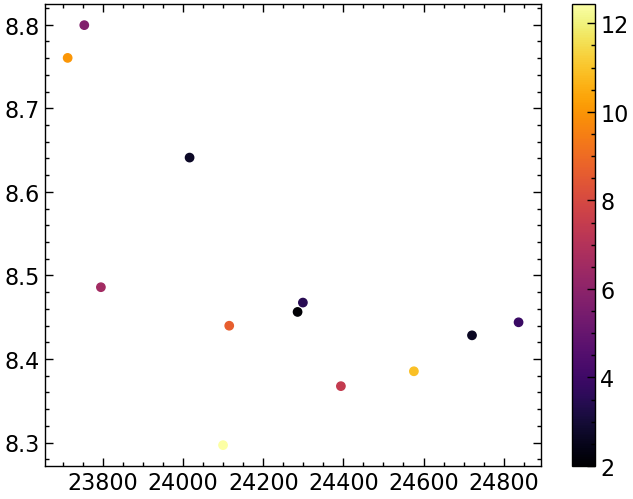

In [77]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [83]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-20-37-03_0.5447894140796702_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


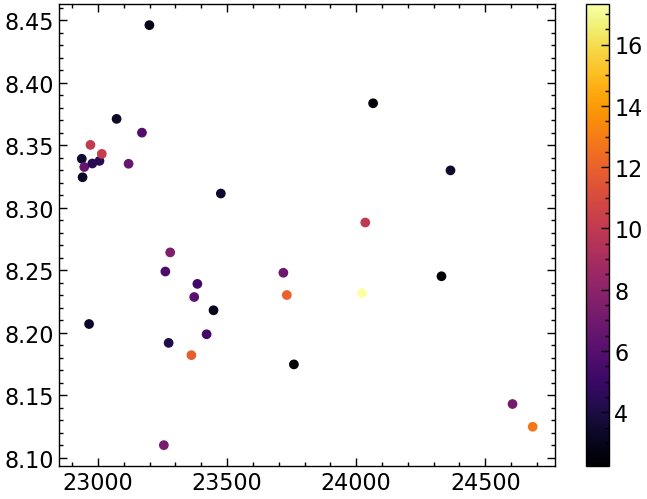

In [85]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [84]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(8.271), np.float64(0.081))

In [86]:
np.log(np.exp(8.498) + np.exp(8.271))

np.float64(9.084074523518728)

In [88]:
np.exp(8.271)/(np.exp(8.498))

np.float64(0.7969207822901407)

In [96]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/hd137613/c2', sep='  ')

/tmp/ipykernel_1361439/265521429.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/hd137613/c2', sep='  ')


In [113]:
rats = np.arange(0.35, 0.7,0.01)
rats = np.repeat(rats, 5)
rats

array([0.35, 0.35, 0.35, 0.35, 0.35, 0.36, 0.36, 0.36, 0.36, 0.36, 0.37,
       0.37, 0.37, 0.37, 0.37, 0.38, 0.38, 0.38, 0.38, 0.38, 0.39, 0.39,
       0.39, 0.39, 0.39, 0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.41, 0.41, 0.41,
       0.41, 0.41, 0.42, 0.42, 0.42, 0.42, 0.42, 0.43, 0.43, 0.43, 0.43,
       0.43, 0.44, 0.44, 0.44, 0.44, 0.44, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.46, 0.46, 0.46, 0.46, 0.46, 0.47, 0.47, 0.47, 0.47, 0.47, 0.48,
       0.48, 0.48, 0.48, 0.48, 0.49, 0.49, 0.49, 0.49, 0.49, 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.51, 0.51, 0.51, 0.51, 0.51, 0.52, 0.52, 0.52,
       0.52, 0.52, 0.53, 0.53, 0.53, 0.53, 0.53, 0.54, 0.54, 0.54, 0.54,
       0.54, 0.55, 0.55, 0.55, 0.55, 0.55, 0.56, 0.56, 0.56, 0.56, 0.56,
       0.57, 0.57, 0.57, 0.57, 0.57, 0.58, 0.58, 0.58, 0.58, 0.58, 0.59,
       0.59, 0.59, 0.59, 0.59, 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.61, 0.61,
       0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63,
       0.63, 0.63, 0.64, 0.64, 0.64, 0.64, 0.64, 0.

In [116]:
len(rats)

175

In [117]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = rats
fitlist2

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(O),A(Fe),A(N),A(Mg),oisorat
0,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.35
1,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.35
2,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.35
3,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.35
4,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.69
171,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.69
172,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.69
173,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.69


In [118]:
fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/hd137613/fitlist_comb', sep=' ', index=False)

In [167]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-15-56-09_0.9324879596047584_LTE_O_1D/output'
# allpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-23-13-22_0.35833114159931434_LTE_O_1D/output"
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-10-19-06_0.7760709184924286_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')


In [168]:
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

In [169]:
np.max(df_fine['Doppler_Shift_add_to_RV'])

np.float64(-0.3113629194376325)

In [170]:
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
rvs = []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    rv = np.mean(subdf['Doppler_Shift_add_to_RV'])
    rvs.append(rv)
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

0.52 -0.11 0.14


Text(0.5, 0, '16O/18O ratio')

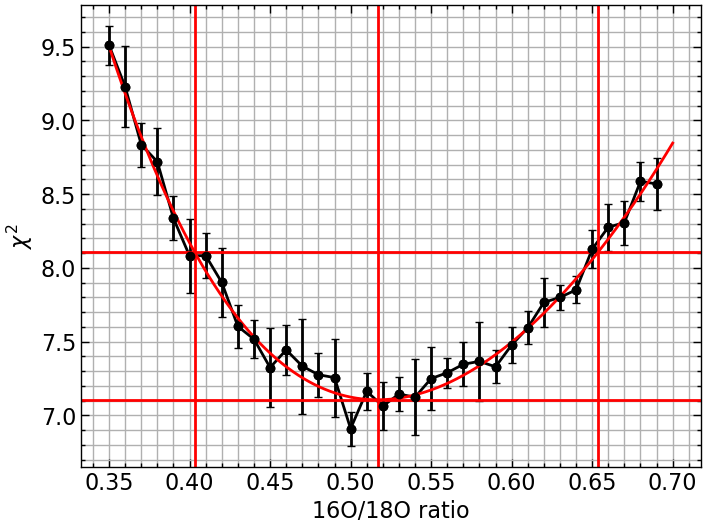

In [171]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(0.35,0.7,1000)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


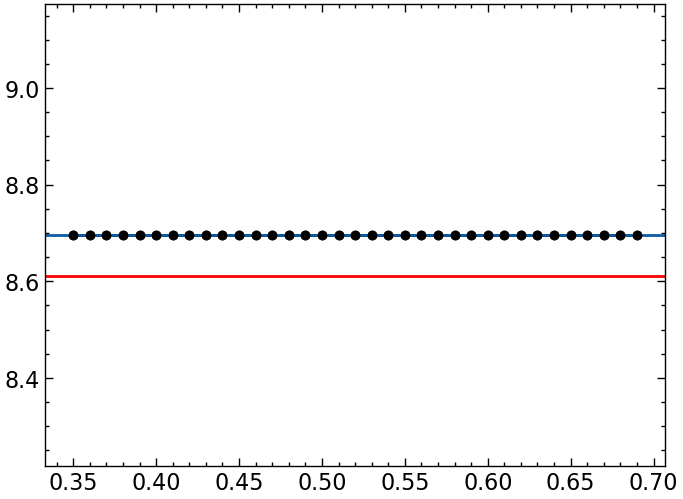

In [165]:
plt.plot(rats, np.array(oabunds)+8.77, 'ko-')
plt.errorbar(rats, np.array(oabunds)+8.77, yerr=doabunds, fmt='ko', capsize=3)
plt.axhline(8.695)
# plt.axhline(8.81, color='r')
plt.axhline(8.695-0.084, color='r')
# plt.axhline(8.81+0.1, color='r')
# plt.axvline(0.52)

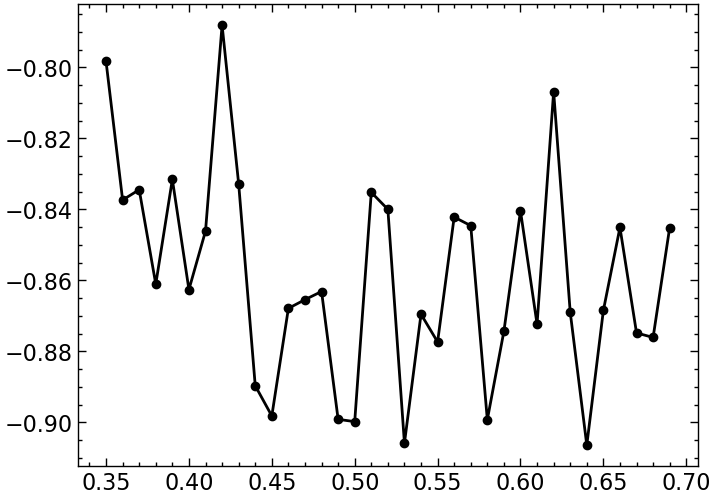

In [166]:
plt.plot(rats, rvs, 'ko-')

In [129]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-18-2024-11-15-46_0.5778776628396651_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


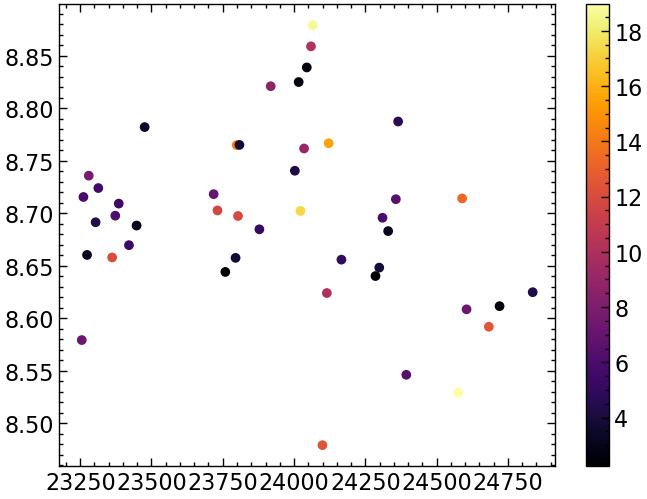

In [130]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [131]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(8.695), np.float64(0.084))

In [135]:
np.mean(output_trimmed['O_Fe'])

np.float64(-0.07461111111111111)

In [2]:
def printexp(n, exp, filt):
    strn = f"{exp}+"*n
    strn = strn[:-1]
    strf = f"{filt}+"*n
    strf = strf[:-1]
    print(strn)
    print(strf)

In [19]:
printexp(10, 5, "r")

5+5+5+5+5+5+5+5+5+5
r+r+r+r+r+r+r+r+r+r


sudo python make_too.py -ra '16:03:18.0' -dec '1:51:46.0' -ra_rate '0.162' -dec_rate '0.014' -filt 'r+r+r+r+r+r+r+r+r+r' -exp '2+2+2+2+2+2+2+2+2+2' -noexp '20+20+20+20+20+20+20+20+20+20' -name 'CK23A030' -p '7500' -obs_type 'NS' -domesleep '50' -d '20241018' -iit_obs 'advait' -hanle_obs 'kaysang' -stack 'Y' -propnums 'P06'

In [ ]:
sudo python make_too.py -ra '15:57:38.593s' -dec '+01:44:30.128' -ra_rate '0.162' -dec_rate '0.014' -filt 'r+r+r+r+r+r+r+r+r+r' -exp '5+5+5+5+5+5+5+5+5+5' -noexp '5+5+5+5+5+5+5+5+5+5' -name 'CK23A030' -p '7900' -obs_type 'NS' -domesleep '50' -d '20241018' -iit_obs 'advait' -hanle_obs 'kaysang' -stack 'Y' -propnums 'P06'

In [17]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Define the two RA/Dec pairs in HMS/DMS format
coord1 = SkyCoord(ra='16h03m18.0s', dec='1d51m46.0s', frame='icrs')
coord2 = SkyCoord(ra='16h08m57.407s', dec='+01d59m01.872s', frame='icrs')

# Calculate the total angular separation between the two coordinates
total_separation = coord1.separation(coord2)

# Calculate the separation in RA and Dec individually
ra_diff = coord2.ra - coord1.ra  # This will be an astropy Quantity
dec_diff = coord2.dec - coord1.dec  # This will be an astropy Quantity

# Convert RA difference to degrees
ra_diff_deg = ra_diff.to(u.deg)

# Print the results
print(f"Total angular separation: {total_separation.deg:.6f} degrees")
print(f"RA difference: {ra_diff_deg:.6f} degrees")
print(f"Dec difference: {dec_diff:.6f}")

#  subtract the difference from coord1

coord1_new = SkyCoord(ra=coord1.ra - ra_diff, dec=coord1.dec - dec_diff, frame='icrs')
print(coord1_new.to_string('hmsdms'))


Total angular separation: 1.418575 degrees
RA difference: 1.414196 deg degrees
Dec difference: 0.121076 deg
15h57m38.593s +01d44m30.128s
